In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Download necessary NLTK data
download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# 1.Apple data

In [2]:
# Load your data
appl= pd.read_csv(r'C:\Users\HP\Desktop\week 1\yfinance_data\AAPL_historical_data.csv')

In [3]:
# Load your data 
news_df = pd.read_csv(r'C:\Users\HP\Desktop\week 1\raw_analyst_ratings.csv')

In [4]:
# Convert the 'Date' column in both dataframes with flexible parsing
news_df['Date'] = pd.to_datetime(news_df['Date'], errors='coerce')
appl['Date'] = pd.to_datetime(appl['Date'], errors='coerce')

# Drop rows where the Date could not be parsed
news_df = news_df.dropna(subset=['Date'])
appl = appl.dropna(subset=['Date'])


In [5]:
# Check rows with problematic date formats
problematic_dates = news_df[news_df['Date'].isna()]
print(problematic_dates['Date'])


Series([], Name: Date, dtype: datetime64[ns])


In [6]:
# Example of parsing dates with a specific format
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')


In [7]:
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
news_df['sentiment_score'] = news_df['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])


In [8]:
print(news_df['sentiment_score'])

0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.2960
            ...  
1048570    0.0000
1048571   -0.4939
1048572   -0.4939
1048573    0.0000
1048574    0.3818
Name: sentiment_score, Length: 1007112, dtype: float64


In [9]:
# Calculate daily returns
appl['daily_return'] = appl['Close'].pct_change()


In [10]:
print(appl['daily_return'])

0             NaN
1       -0.052171
2       -0.073398
3        0.024751
4        0.028992
           ...   
10993   -0.028754
10994   -0.004805
10995    0.002161
10996    0.001285
10997    0.002566
Name: daily_return, Length: 10998, dtype: float64


In [11]:
# Group by date and calculate the average sentiment score
daily_sentiment = news_df.groupby('Date')['sentiment_score'].mean().reset_index()


In [12]:
# Merge the dataframes on the Date column
merged_df = pd.merge(appl, daily_sentiment, on='Date', how='inner')


In [13]:
# Drop NaN values that may exist after the merge
merged_df.dropna(subset=['daily_return', 'sentiment_score'], inplace=True)

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['daily_return'], merged_df['sentiment_score'])

print(f'Correlation: {correlation}, P-value: {p_value}')


Correlation: 0.15450752658238165, P-value: 3.70817177172983e-16


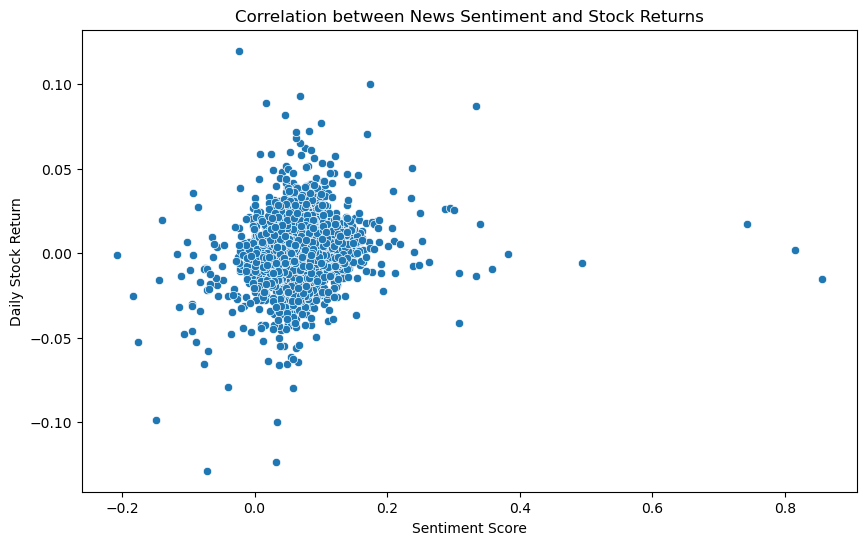

In [14]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['daily_return'])
plt.title('Correlation between News Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


# 2.Amazon Data

In [15]:
# Load your data
amazon = pd.read_csv(r'C:\Users\HP\Desktop\week 1\yfinance_data\AMZN_historical_data.csv')

In [16]:
# Load your data 
news_df = pd.read_csv(r'C:\Users\HP\Desktop\week 1\raw_analyst_ratings.csv')

In [17]:
# Convert the 'Date' column in both dataframes with flexible parsing
news_df['Date'] = pd.to_datetime(news_df['Date'], errors='coerce')
amazon['Date'] = pd.to_datetime(amazon['Date'], errors='coerce')

# Drop rows where the Date could not be parsed
news_df = news_df.dropna(subset=['Date'])
amazon = amazon.dropna(subset=['Date'])

In [18]:
# Check rows with problematic date formats
problematic_dates = news_df[news_df['Date'].isna()]
print(problematic_dates['Date'])


Series([], Name: Date, dtype: datetime64[ns])


In [19]:
# Example of parsing dates with a specific format
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')


In [20]:
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
news_df['sentiment_score'] = news_df['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])


In [21]:
print(news_df['sentiment_score'])

0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.2960
            ...  
1048570    0.0000
1048571   -0.4939
1048572   -0.4939
1048573    0.0000
1048574    0.3818
Name: sentiment_score, Length: 1007112, dtype: float64


In [22]:
# Calculate daily returns
amazon['daily_return'] = amazon['Close'].pct_change()



In [23]:
print(amazon['daily_return'])

0            NaN
1      -0.117028
2      -0.012040
3      -0.042685
4      -0.127392
          ...   
6841   -0.029934
6842   -0.005419
6843    0.014734
6844    0.003836
6845   -0.008133
Name: daily_return, Length: 6846, dtype: float64


In [24]:
# Group by date and calculate the average sentiment score
daily_sentiment = news_df.groupby('Date')['sentiment_score'].mean().reset_index()


In [25]:
# Merge the dataframes on the Date column
merged_df1 = pd.merge(appl, daily_sentiment, on='Date', how='inner')


In [26]:
# Drop NaN values that may exist after the merge
merged_df1.dropna(subset=['daily_return', 'sentiment_score'], inplace=True)

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df1['daily_return'], merged_df1['sentiment_score'])

print(f'Correlation: {correlation}, P-value: {p_value}')


Correlation: 0.15450752658238165, P-value: 3.70817177172983e-16


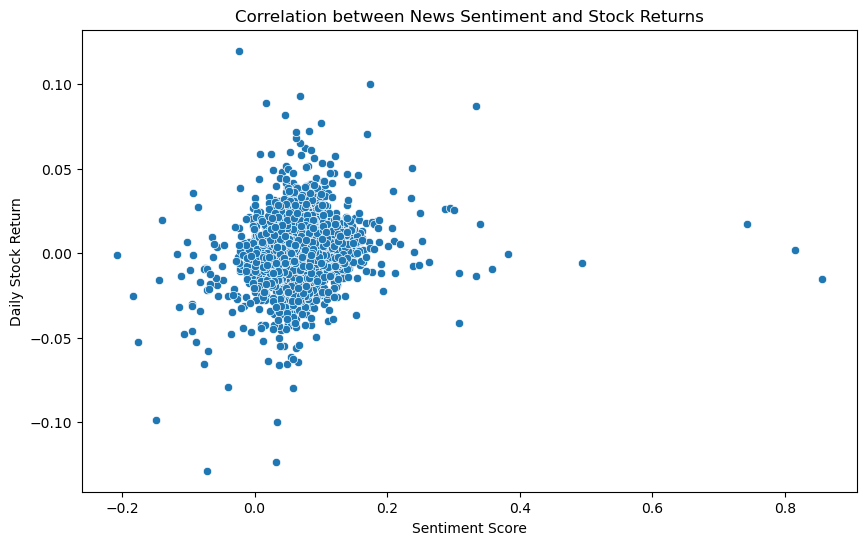

In [27]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['daily_return'])
plt.title('Correlation between News Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


# 3.Google data

In [28]:
# Load your data
Google= pd.read_csv(r'C:\Users\HP\Desktop\week 1\yfinance_data\GOOG_historical_data.csv')

In [29]:
# Load your data 
news_df = pd.read_csv(r'C:\Users\HP\Desktop\week 1\raw_analyst_ratings.csv')

In [30]:
# Convert the 'Date' column in both dataframes with flexible parsing
news_df['Date'] = pd.to_datetime(news_df['Date'], errors='coerce')
Google['Date'] = pd.to_datetime(Google['Date'], errors='coerce')

# Drop rows where the Date could not be parsed
news_df = news_df.dropna(subset=['Date'])
Google = Google.dropna(subset=['Date'])

In [31]:
# Check rows with problematic date formats
problematic_dates = news_df[news_df['Date'].isna()]
print(problematic_dates['Date'])


Series([], Name: Date, dtype: datetime64[ns])


In [32]:
# Example of parsing dates with a specific format
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')


In [33]:
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
news_df['sentiment_score'] = news_df['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])


In [34]:
print(news_df['sentiment_score'])

0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.2960
            ...  
1048570    0.0000
1048571   -0.4939
1048572   -0.4939
1048573    0.0000
1048574    0.3818
Name: sentiment_score, Length: 1007112, dtype: float64


In [35]:
# Calculate daily returns
Google['daily_return'] = Google ['Close'].pct_change()

In [36]:
print(Google['daily_return'])

0            NaN
1       0.079430
2       0.010064
3      -0.041408
4       0.010775
          ...   
5015   -0.050272
5016   -0.029879
5017   -0.002838
5018    0.014525
5019    0.004266
Name: daily_return, Length: 5020, dtype: float64


In [37]:
# Merge the dataframes on the Date column
merged_df = pd.merge(Google, daily_sentiment, on='Date', how='inner')


In [38]:
# Drop NaN values that may exist after the merge
merged_df.dropna(subset=['daily_return', 'sentiment_score'], inplace=True)

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['daily_return'], merged_df1['sentiment_score'])

print(f'Correlation: {correlation}, P-value: {p_value}')


Correlation: 0.13045781952399846, P-value: 6.532634298477566e-12


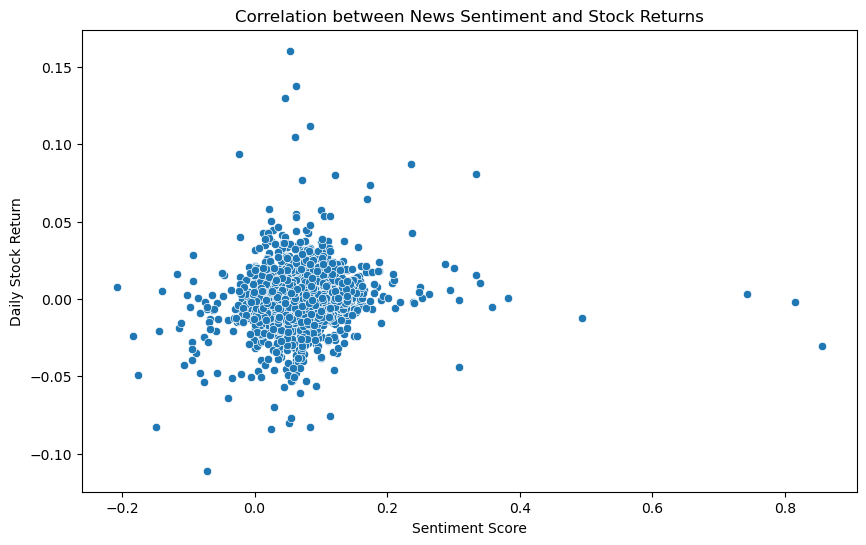

In [39]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['daily_return'])
plt.title('Correlation between News Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


# 4.Meta Data

In [40]:
# Load your data
meta= pd.read_csv(r'C:\Users\HP\Desktop\week 1\yfinance_data\META_historical_data.csv')

In [41]:
# Load your data 
news_df = pd.read_csv(r'C:\Users\HP\Desktop\week 1\raw_analyst_ratings.csv')


In [42]:
# Convert the 'Date' column in both dataframes with flexible parsing
news_df['Date'] = pd.to_datetime(news_df['Date'], errors='coerce')
meta['Date'] = pd.to_datetime(meta['Date'], errors='coerce')

# Drop rows where the Date could not be parsed
news_df = news_df.dropna(subset=['Date'])
meta = meta.dropna(subset=['Date'])

In [43]:
# Check rows with problematic date formats
problematic_dates = news_df[news_df['Date'].isna()]
print(problematic_dates['Date'])

Series([], Name: Date, dtype: datetime64[ns])


In [44]:
# Example of parsing dates with a specific format
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

In [45]:
sia = SentimentIntensityAnalyzer()
# Apply sentiment analysis
news_df['sentiment_score'] = news_df['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
print(news_df['sentiment_score'])

0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.2960
            ...  
1048570    0.0000
1048571   -0.4939
1048572   -0.4939
1048573    0.0000
1048574    0.3818
Name: sentiment_score, Length: 1007112, dtype: float64


In [46]:
# Calculate daily returns
meta['daily_return'] = meta['Close'].pct_change()
print(meta['daily_return'])

0            NaN
1       0.023930
2      -0.050637
3      -0.002238
4       0.035888
          ...   
2921   -0.056109
2922   -0.017040
2923    0.027106
2924    0.000021
2925   -0.005411
Name: daily_return, Length: 2926, dtype: float64


In [47]:
# Merge the dataframes on the Date column
merged_df = pd.merge(meta, daily_sentiment, on='Date', how='inner')


In [48]:
# Drop NaN values that may exist after the merge
merged_df.dropna(subset=['daily_return', 'sentiment_score'], inplace=True)

# Calculate the Pearson correlation coefficient using the same DataFrame
correlation, p_value = pearsonr(merged_df['daily_return'], merged_df['sentiment_score'])

print(f'Correlation: {correlation}, P-value: {p_value}')


Correlation: 0.17731571548474023, P-value: 9.437124979207028e-15


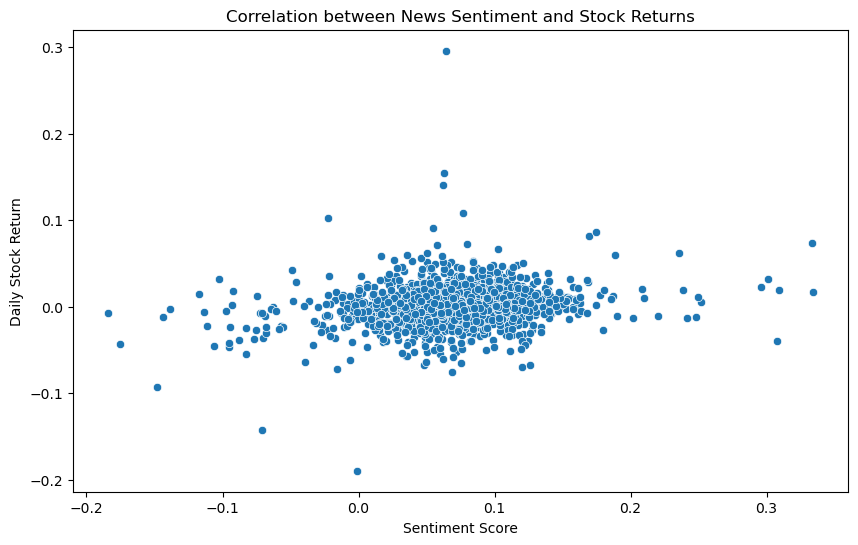

In [49]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['daily_return'])
plt.title('Correlation between News Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


# 5.Microsoft data

In [50]:
# Load your data
microsoft= pd.read_csv(r'C:\Users\HP\Desktop\week 1\yfinance_data\MSFT_historical_data.csv')

In [51]:
# Load your data 
news_df = pd.read_csv(r'C:\Users\HP\Desktop\week 1\raw_analyst_ratings.csv')


In [52]:
# Convert the 'Date' column in both dataframes with flexible parsing
news_df['Date'] = pd.to_datetime(news_df['Date'], errors='coerce')
microsoft['Date'] = pd.to_datetime(microsoft['Date'], errors='coerce')

# Drop rows where the Date could not be parsed
news_df = news_df.dropna(subset=['Date'])
microsoft = microsoft.dropna(subset=['Date'])

In [53]:
# Check rows with problematic date formats
problematic_dates = news_df[news_df['Date'].isna()]
print(problematic_dates['Date'])

Series([], Name: Date, dtype: datetime64[ns])


In [54]:
# Example of parsing dates with a specific format
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

In [55]:
sia = SentimentIntensityAnalyzer()
# Apply sentiment analysis
news_df['sentiment_score'] = news_df['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
print(news_df['sentiment_score'])

0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.2960
            ...  
1048570    0.0000
1048571   -0.4939
1048572   -0.4939
1048573    0.0000
1048574    0.3818
Name: sentiment_score, Length: 1007112, dtype: float64


In [58]:
# Calculate daily returns
microsoft['daily_return'] = microsoft['Close'].pct_change()
print(microsoft['daily_return'])

0            NaN
1       0.035712
2       0.017250
3      -0.025432
4      -0.017390
          ...   
9667   -0.035855
9668   -0.024481
9669    0.016420
9670    0.003433
9671   -0.008928
Name: daily_return, Length: 9672, dtype: float64


In [59]:
# Merge the dataframes on the Date column
merged_df = pd.merge(microsoft, daily_sentiment, on='Date', how='inner')


In [60]:
# Drop NaN values that may exist after the merge
merged_df.dropna(subset=['daily_return', 'sentiment_score'], inplace=True)

# Calculate the Pearson correlation coefficient using the same DataFrame
correlation, p_value = pearsonr(merged_df['daily_return'], merged_df['sentiment_score'])

print(f'Correlation: {correlation}, P-value: {p_value}')


Correlation: 0.1338127400452873, P-value: 1.845100500735029e-12


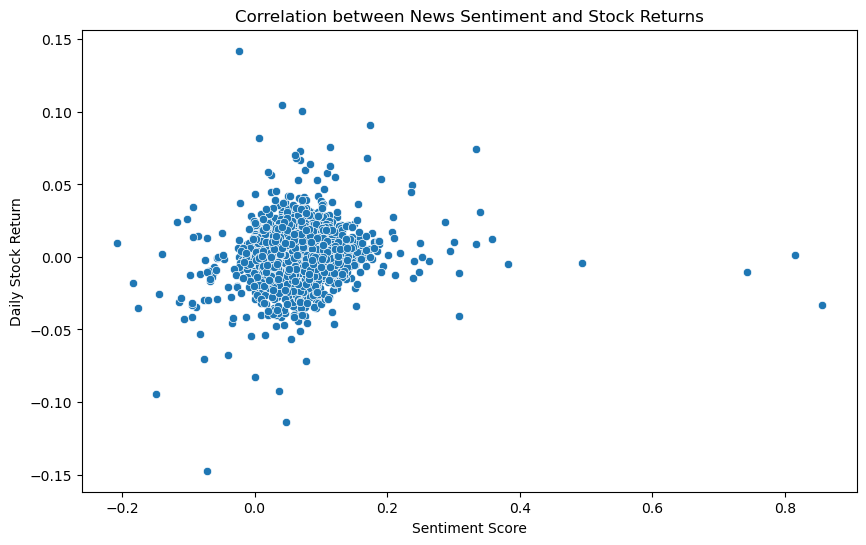

In [61]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['daily_return'])
plt.title('Correlation between News Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


# 6.NVDA data

In [62]:
# Load your data
nvda= pd.read_csv(r'C:\Users\HP\Desktop\week 1\yfinance_data\NVDA_historical_data.csv')

In [63]:
# Load your data 
news_df = pd.read_csv(r'C:\Users\HP\Desktop\week 1\raw_analyst_ratings.csv')


In [64]:
# Convert the 'Date' column in both dataframes with flexible parsing
news_df['Date'] = pd.to_datetime(news_df['Date'], errors='coerce')
nvda['Date'] = pd.to_datetime(nvda['Date'], errors='coerce')

# Drop rows where the Date could not be parsed
news_df = news_df.dropna(subset=['Date'])
nvda= nvda.dropna(subset=['Date'])

In [65]:
# Check rows with problematic date formats
problematic_dates = news_df[news_df['Date'].isna()]
print(problematic_dates['Date'])

Series([], Name: Date, dtype: datetime64[ns])


In [66]:
# Example of parsing dates with a specific format
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

In [67]:
sia = SentimentIntensityAnalyzer()
# Apply sentiment analysis
news_df['sentiment_score'] = news_df['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
print(news_df['sentiment_score'])

0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.2960
            ...  
1048570    0.0000
1048571   -0.4939
1048572   -0.4939
1048573    0.0000
1048574    0.3818
Name: sentiment_score, Length: 1007112, dtype: float64


In [68]:
# Calculate daily returns
nvda['daily_return'] = nvda['Close'].pct_change()
print(nvda['daily_return'])

0            NaN
1       0.104764
2      -0.077594
3      -0.003110
4      -0.003144
          ...   
6416   -0.068032
6417   -0.017243
6418    0.006947
6419   -0.013002
6420   -0.070436
Name: daily_return, Length: 6421, dtype: float64


In [69]:
# Merge the dataframes on the Date column
merged_df = pd.merge(nvda, daily_sentiment, on='Date', how='inner')


In [70]:
# Drop NaN values that may exist after the merge
merged_df.dropna(subset=['daily_return', 'sentiment_score'], inplace=True)

# Calculate the Pearson correlation coefficient using the same DataFrame
correlation, p_value = pearsonr(merged_df['daily_return'], merged_df['sentiment_score'])

print(f'Correlation: {correlation}, P-value: {p_value}')


Correlation: 0.12461682646867892, P-value: 5.4693033281231676e-11


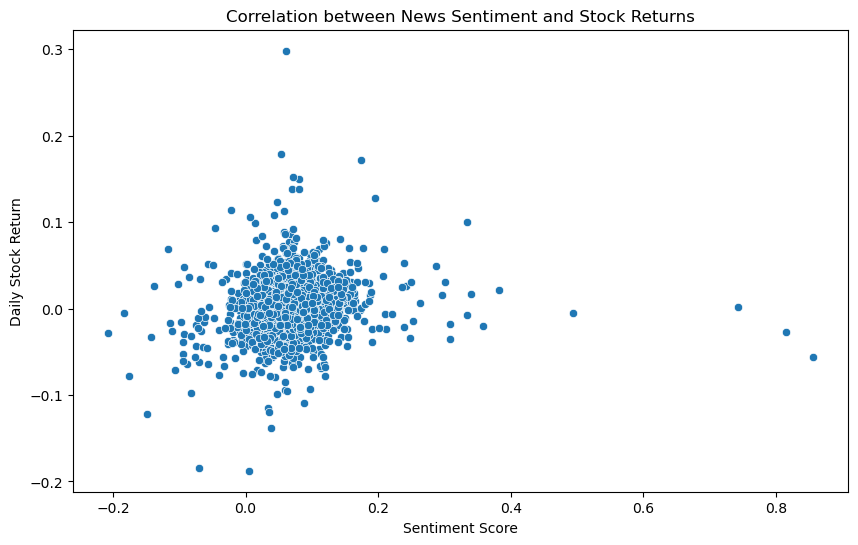

In [71]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['daily_return'])
plt.title('Correlation between News Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()


# 7.Tesla Data

In [72]:
# Load your data
tesla= pd.read_csv(r'C:\Users\HP\Desktop\week 1\yfinance_data\TSLA_historical_data.csv')

In [73]:
# Load your data 
news_df = pd.read_csv(r'C:\Users\HP\Desktop\week 1\raw_analyst_ratings.csv')


In [74]:
# Convert the 'Date' column in both dataframes with flexible parsing
news_df['Date'] = pd.to_datetime(news_df['Date'], errors='coerce')
tesla['Date'] = pd.to_datetime(tesla['Date'], errors='coerce')

# Drop rows where the Date could not be parsed
news_df = news_df.dropna(subset=['Date'])
tesla = tesla.dropna(subset=['Date'])

In [75]:
# Check rows with problematic date formats
problematic_dates = news_df[news_df['Date'].isna()]
print(problematic_dates['Date'])

Series([], Name: Date, dtype: datetime64[ns])


In [76]:
# Example of parsing dates with a specific format
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

In [77]:
sia = SentimentIntensityAnalyzer()
# Apply sentiment analysis
news_df['sentiment_score'] = news_df['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
print(news_df['sentiment_score'])

0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.2960
            ...  
1048570    0.0000
1048571   -0.4939
1048572   -0.4939
1048573    0.0000
1048574    0.3818
Name: sentiment_score, Length: 1007112, dtype: float64


In [78]:
# Calculate daily returns
tesla['daily_return'] = tesla['Close'].pct_change()
print(tesla['daily_return'])

0            NaN
1      -0.002511
2      -0.078473
3      -0.125683
4      -0.160937
          ...   
3540   -0.123346
3541    0.019723
3542   -0.002043
3543    0.055960
3544   -0.040845
Name: daily_return, Length: 3545, dtype: float64


In [79]:
# Merge the dataframes on the Date column
merged_df = pd.merge(tesla, daily_sentiment, on='Date', how='inner')


In [80]:
# Drop NaN values that may exist after the merge
merged_df.dropna(subset=['daily_return', 'sentiment_score'], inplace=True)

# Calculate the Pearson correlation coefficient using the same DataFrame
correlation, p_value = pearsonr(merged_df['daily_return'], merged_df['sentiment_score'])

print(f'Correlation: {correlation}, P-value: {p_value}')


Correlation: 0.12865993164293468, P-value: 1.0706010482884154e-10


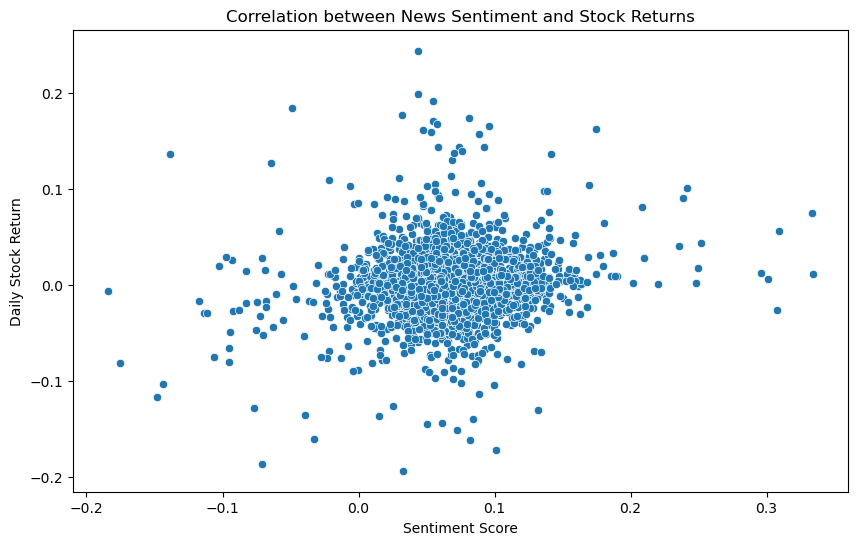

In [81]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['sentiment_score'], y=merged_df['daily_return'])
plt.title('Correlation between News Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()
